Second part of this notebook continues in [Pandas Hurricane 2](./PandasHurricane2.ipynb)
<br>Current notebook has:
1. Track and Intensity variation by decade
2. Month
3. Day
4. Hour

# Importing Data, Creating a df, & Basics

In [1]:
import pandas as pd
import numpy as np

NHCFV1=pd.read_csv('1970-present_OFCL_v_BCD5_ind_ATL_TI_errors_noTDs.txt', sep='\s+', engine='python')
print(NHCFV1) 
#after copy/pasting textfile into a seperate tab in jupyter notebook:
# code: label=pd.read_csv('filename.txt', sep='\s+', engine='python')
#sep= is the seperator field. /s+ and engine='python' is to avoid an error code of text files 
#with a ridiculous amount of columns

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
0      20-05-1970/00:00:00  AL011970  0.00  0.00   0.0   0.0   0.0   0.0   
1      20-05-1970/06:00:00  AL011970  0.00  0.00   0.0   0.0   0.0   0.0   
2      20-05-1970/12:00:00  AL011970  0.00  0.00   0.0   0.0   0.0   0.0   
3      20-05-1970/18:00:00  AL011970  1.00  1.00   0.0   0.0   0.0   0.0   
4      21-05-1970/00:00:00  AL011970  0.33  0.33   0.0   0.0   0.0   0.0   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
11152  23-11-2019/18:00:00  AL202019  0.33  0.33   0.0   0.0   0.0   0.0   
11153  24-11-2019/00:00:00  AL202019  0.33  0.00   0.0   0.0   0.0   0.0   
11154  24-11-2019/06:00:00  AL202019  0.33  0.00   0.0   0.0   0.0   0.0   
11155  24-11-2019/12:00:00  AL202019  0.00  0.00   0.0   0.0   0.0   0.0   
11156  24-11-2019/18:00:00  AL202019  0.00  0.00   0.0   0.0   0.0   0.0   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
0      

In [ ]:
type(NHCFV1) #shows the type of mode it is =dataframe
print(NHCFV1['STMID'])
NHCFV1['STMID'].unique()
len(NHCFV1['STMID'].unique())

In [113]:
NHCFV1.head(4) #prints x number of rows - doesn't print more than 60 rows

,Date/Time,STMID,F012,F024,F036,F048,F072,F096,F120,F144,...,000hI02,012hI02,024hI02,036hI02,048hI02,072hI02,096hI02,120hI02,144hI02,168hI02
0,20-05-1970/00:00:00,AL011970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,20-05-1970/06:00:00,AL011970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,20-05-1970/12:00:00,AL011970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,20-05-1970/18:00:00,AL011970,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [ ]:
NHCFV1.at[11, 'F120'] #.at: Access a single value for a row/column label pair.
#prints the values at rows x in whatever column''
##Figure out how to print double digit rows and more than one column **


In [ ]:
NHCFV1.loc[:20, ["Date/Time","STMID"]] 

# .loc accesses multiple columns and columns with text labels. 
# the left side of the comma is rows, right is columns
#[[]] ensures it is in a dataframe format
# : means that it will return all 

In [ ]:
NHCFV1.iloc[:, 0:20] # .iloc accesses multiple columns ~doesn't go over 20 --for number labels

## T's Work

In [117]:
#NEW - T's work
#Create a list ranges. Each individual range is a list of a start and end point
set_of_ranges = [ [10,10], [60,70] ]

#Create an empty dataframe that we'll fill as our output
output_df = pd.DataFrame()

#Loop over the individual ranges to append to the empty dataframe
for individual_range in set_of_ranges:
    print('individual_range', individual_range) #gives the label and value of what the individual range is 
    #so I'm not confused and can see what these values are
    
    #A data frame from the individual range
    ind_range_df=NHCFV1[individual_range[0]:individual_range[1]+1]
    
    #Appends to the output data frame
    output_df = output_df.append(ind_range_df)
    
#Prints the results    
output_df

individual_range [10, 10]
individual_range [60, 70]


/glade/scratch/jrobinson/ipykernel_287779/2402478235.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(ind_range_df)


,Date/Time,STMID,F012,F024,F036,F048,F072,F096,F120,F144,...,000hI02,012hI02,024hI02,036hI02,048hI02,072hI02,096hI02,120hI02,144hI02,168hI02
10,20-07-1970/18:00:00,AL021970,0.33,0.33,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
60,15-09-1970/18:00:00,AL131970,0.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
61,16-09-1970/00:00:00,AL131970,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
62,16-09-1970/06:00:00,AL131970,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
63,26-09-1970/12:00:00,AL161970,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
64,26-09-1970/18:00:00,AL161970,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
65,27-09-1970/00:00:00,AL161970,0.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
66,27-09-1970/06:00:00,AL161970,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
67,27-09-1970/12:00:00,AL161970,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
68,05-07-1971/18:00:00,AL011971,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [118]:
#Creates a function that will take an arbitrary input.
#Note the format is such that a single rangle must be given as a list in a list
#    i.e. getRange([[X,Y]])

#Defines the function
def getRange(setRange):
    out_df = pd.DataFrame()
    #returns an output which is that one-line loop we made
    return out_df.append([ NHCFV1[ indRange[0]:indRange[1]+1] for indRange in setRange ])

print(getRange([[2,5]]))

             Date/Time     STMID  F012  F024  F036  F048  F072  F096  F120  \
2  20-05-1970/12:00:00  AL011970  0.00  0.00   0.0   0.0   0.0   0.0   0.0   
3  20-05-1970/18:00:00  AL011970  1.00  1.00   0.0   0.0   0.0   0.0   0.0   
4  21-05-1970/00:00:00  AL011970  0.33  0.33   0.0   0.0   0.0   0.0   0.0   
5  21-05-1970/06:00:00  AL011970  0.33  0.00   0.0   0.0   0.0   0.0   0.0   

   F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  096hI02  \
2   0.0  ...  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0   
3   0.0  ...  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0   
4   0.0  ...  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0   
5   0.0  ...  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0   

   120hI02  144hI02  168hI02  
2  -9999.0  -9999.0  -9999.0  
3  -9999.0  -9999.0  -9999.0  
4  -9999.0  -9999.0  -9999.0  
5  -9999.0  -9999.0  -9999.0  

[4 rows x 54 columns]


/glade/scratch/jrobinson/ipykernel_287779/1269861210.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return out_df.append([ NHCFV1[ indRange[0]:indRange[1]+1] for indRange in setRange ])


In [119]:
example = getRange([ [0,5] ])
example[ ['Date/Time','STMID'] ]

/glade/scratch/jrobinson/ipykernel_287779/1269861210.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return out_df.append([ NHCFV1[ indRange[0]:indRange[1]+1] for indRange in setRange ])


,Date/Time,STMID
0,20-05-1970/00:00:00,AL011970
1,20-05-1970/06:00:00,AL011970
2,20-05-1970/12:00:00,AL011970
3,20-05-1970/18:00:00,AL011970
4,21-05-1970/00:00:00,AL011970
5,21-05-1970/06:00:00,AL011970


In [120]:
#Getting specific columns with T's range code for the rows
track_1970 = getRange([ [0,67] ])
track_1970[["STMID", "024hI01", "048hI01","072hI01","096hI01","120hI01","144hI01", "024hT01", "048hT01","072hT01","096hT01","120hT01","144hT01"]]

/glade/scratch/jrobinson/ipykernel_287779/1269861210.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return out_df.append([ NHCFV1[ indRange[0]:indRange[1]+1] for indRange in setRange ])


,STMID,024hI01,048hI01,072hI01,096hI01,120hI01,144hI01,024hT01,048hT01,072hT01,096hT01,120hT01,144hT01
0,AL011970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,AL011970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,AL011970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,AL011970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,145.4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,AL011970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,139.7,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,AL161970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
64,AL161970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
65,AL161970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
66,AL161970,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [121]:
#Removing columns we don't need COME BACK TO THIS
NHCFV1.drop([['STMID', 'F012','F036','F168','Lat']])
NHCFV1.drop('Lon','012hT01','036hT01','168hT01','012hI01','036hI01','168hI01','012hT02','036hT02','072hT02','120hT02','168hT02','012hI02','036hI02','168hI02')

KeyError: "[('STMID', 'F012', 'F036', 'F168', 'Lat')] not found in axis"

In [ ]:
#get average error (mean) of forecast data
#Getting specific columns with the T's range code for the rows
range_track_1970 = getRange([ [0,67] ])
track_1970=range_track_1970[["Date/Time", "F024", "F048","F072", "F096", "F120", "F144",]]
print(track_1970)

mean_track_1970= pd.Series.mean(track_1970) #pandas.Series.mean finds the mean in all of the columns
print(mean_track_1970)
    
total_mean_track_1970= pd.DataFrame.mean(mean_track_1970)
print('total mean: ', (mean_track_1970))

# Start Here 

*Forecast section is not the actual forecast #'s. It's the size? of the error of which the forecast changed from it's last position*

### Track Mean of AL122005

In [ ]:
#made a variable that outputs all of the columns for a specific storm inside of the STORMID area
AL122005 = NHCFV1[NHCFV1["STMID"].isin(['AL122005'])]

#hT01 Official
# 000hT01      3.716667
# 024hT01     43.460000
# 048hT01    108.612500
# 072hT01    178.158333
# 096hT01    237.550000
# 120hT01    244.850000
# 144hT01           NaN


#F Mean excluding 0
# F024    0.363500
# F048    0.371875
# F072    0.385833
# F096    0.413750
# F120    0.497500
# F144         NaN

#hI01 Official
# 000hI01    -0.625000
# 024hI01    -5.250000
# 048hI01   -19.687500
# 072hI01   -28.333333
# 096hI01   -49.375000
# 120hI01   -22.500000
# 144hI01          NaN

In [ ]:
track_AL122005=AL122005[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]
print(track_AL122005)


In [ ]:
#Filter Step
x= track_AL122005
t_AL=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

In [ ]:
mean_track_AL122005= t_AL.mean() #pandas.Series.mean finds the mean in all of the columns

print(mean_track_AL122005)

### Intensity Mean of AL122005 

In [ ]:
intensity_AL122005=AL122005[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]
print(intensity_AL122005)


In [ ]:
#Short version of getting the mean and incorp the where function with intensity 

mean_intensity_AL122005= intensity_AL122005.where(intensity_AL122005> -9999.0).mean()
print(mean_intensity_AL122005)

In [ ]:
#Longer version of the cell above

intensity_AL122005=AL122005[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]

#Filter Step
x= intensity_AL122005
i_AL=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

mean_track_AL122005= i_AL.mean() #pandas.Series.mean finds the mean in all of the columns

print(mean_track_AL122005)

### Forecast Mean of AL122005 

In [ ]:
#Same mean and where function for forcast

forecast_AL122005=AL122005[["F024", "F048", "F072", "F096", "F120", "F144"]]
print(forecast_AL122005)


mean_forecast_AL122005= forecast_AL122005.where(forecast_AL122005> 0).mean()
print(mean_forecast_AL122005)

### Track Mean of Entire Dataset

In [23]:
#Track Mean of Entire Dataset

track_NHCFV1 = NHCFV1[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]
print(track_NHCFV1)

#Filter Step
x= track_NHCFV1
t_NHCFV=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_track_NHCFV1= t_NHCFV.mean()
print(mean_track_NHCFV1)

# 000hT01     11.425600
# 024hT01     74.214554
# 048hT01    141.736883
# 072hT01    210.126525
# 096hT01    171.032515
# 120hT01    226.521224
# 144hT01           NaN

       000hT01  024hT01  048hT01  072hT01  096hT01  120hT01  144hT01
0      -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1      -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
2      -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
3         42.4    145.4  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
4         49.6    139.7  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
...        ...      ...      ...      ...      ...      ...      ...
11152      6.0     37.2  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11153      5.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11154      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11155     11.4  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11156     22.3  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0

[11157 rows x 7 columns]
000hT01     11.425600
024hT01     74.214554
048hT01    141.736883
072hT01    210.126525
096hT01    171.032515
120hT01    226.521224
144hT01       

### Track Absolute Mean of Dataset

In [ ]:
#Min value = no negatives - so absolute mean values should be the same as reg vals =true
t_NHCFV.min()

In [ ]:
#Track df
track_NHCFV1=NHCFV1[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]

#Filter Step
x= track_NHCFV1
t_NHCFV=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Absolute value Step
abs_t_NHCFV=t_NHCFV.abs()

In [ ]:
#Mean step 
abs_mean_t_NHCFV1= abs_t_NHCFV.mean()
print(abs_mean_t_NHCFV1)

### Intensity Mean of Entire Dataset

In [ ]:
#Intensity Mean of Entire Dataset


intensity_NHCFV1=NHCFV1[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]
print(intensity_NHCFV1)

#Filter Step
x= intensity_NHCFV1
i_NHCFV=x.where(x>-9999.0) #.where function changes values you don't want computed into NaN
print(i_NHCFV)


In [ ]:
#Mean step 
#The means of intensity show (-) the forecast underestimated the wind speed of the storm 
#while (+) overestimates the wind speed of the storm
mean_intensity_NHCFV1= i_NHCFV.mean()
print(mean_intensity_NHCFV1)

### Intensity Absolute Mean of Dataset

In [3]:
#intesnity df
intensity_NHCFV1=NHCFV1[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]

#Filter Step
x= intensity_NHCFV1
i_NHCFV=x.where(x>-9999.0) #.where function changes values you don't want computed into NaN

In [4]:
i_NHCFV

,000hI01,024hI01,048hI01,072hI01,096hI01,120hI01,144hI01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
11152,0.0,0.0,NaN,NaN,NaN,NaN,NaN
11153,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11154,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11155,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
intensity_NHCFV1

,000hI01,024hI01,048hI01,072hI01,096hI01,120hI01,144hI01
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...
11152,0.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
11153,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
11154,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
11155,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [6]:
#Shows a select number of rows. This portion has actual numbers to see if (the absolute value) worked
i_NHCFV.loc[11140:11150,]

#Shows/prints max and min values
print('Intensity_Dataset_Max: ', i_NHCFV.where(x>-9999.0).max()) 
print('Intensity_Dataset_Min: ', i_NHCFV.where(x>-9999.0).min())

Intensity_Dataset_Max:  000hI01    30.0
024hI01    75.0
048hI01    95.0
072hI01    80.0
096hI01    75.0
120hI01    80.0
144hI01     NaN
dtype: float64
Intensity_Dataset_Min:  000hI01    -35.0
024hI01    -70.0
048hI01    -95.0
072hI01    -90.0
096hI01    -90.0
120hI01   -100.0
144hI01      NaN
dtype: float64


In [7]:
#Absolute value of the intensity df
abs_i_NHCFV=i_NHCFV.where(x>-9999.0).abs()

In [8]:
#Calculate the mean of the absolute error values

abs_mean_intensity_NHCFV1=abs_i_NHCFV.mean()
print(abs_mean_intensity_NHCFV1)

000hI01     2.578377
024hI01    10.113429
048hI01    14.670411
072hI01    17.024100
096hI01    16.169247
120hI01    17.442177
144hI01          NaN
dtype: float64


# Plot By Decade

## Track Mean Plots

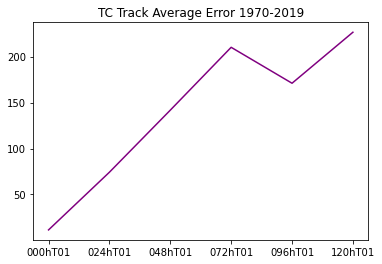

In [24]:
import matplotlib.pyplot as plt

#Split up into decades one for track and then one for intensity. 2 plots with 5 lines each


#Track Mean of All Data set


mean_track_NHCFV1.plot(#kind = 'scatter',
        x = 'Track (hr)',
        y = 'Average Error',
        color = 'purple')
  
# set the title
plt.title('TC Track Average Error 1970-2019')
  
# show the plot
plt.show()

### Means of Track By Decade

In [25]:
#Mean 1970

NHCFV1_1970 = NHCFV1[NHCFV1["Date/Time"].str.contains("197")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_NHCFV_1970 = NHCFV1_1970[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]

#Filter Step
x= t_NHCFV_1970
t_1970=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_1970= t_1970.mean()
print(mean_t_1970)

000hT01     19.862429
024hT01    115.644490
048hT01    252.485484
072hT01    384.017515
096hT01           NaN
120hT01           NaN
144hT01           NaN
dtype: float64


In [26]:
#Mean 1980

NHCFV1_1980 = NHCFV1[NHCFV1["Date/Time"].str.contains("198")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_NHCFV_1980 = NHCFV1_1980[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]

#Filter Step
x= t_NHCFV_1980
t_1980=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_1980= t_1980.mean()
print(mean_t_1980)

000hT01     18.052563
024hT01    111.111188
048hT01    226.348866
072hT01    344.833053
096hT01           NaN
120hT01           NaN
144hT01           NaN
dtype: float64


In [27]:
#Mean 1990

NHCFV1_1990 = NHCFV1[NHCFV1["Date/Time"].str.contains("199")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_NHCFV_1990 = NHCFV1_1990[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]

#Filter Step
x= t_NHCFV_1990
t_1990=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_1990= t_1990.mean()
print(mean_t_1990)

000hT01     12.198253
024hT01     85.372791
048hT01    157.211625
072hT01    233.544045
096hT01           NaN
120hT01           NaN
144hT01           NaN
dtype: float64


In [28]:
#Mean 2000

NHCFV1_2000 = NHCFV1[NHCFV1["Date/Time"].str.contains("200")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_NHCFV_2000 = NHCFV1_2000[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]

#Filter Step
x= t_NHCFV_2000
t_2000=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_2000= t_2000.mean()
print(mean_t_2000)

000hT01      6.719692
024hT01     57.011518
048hT01    103.626214
072hT01    153.515226
096hT01    202.658740
120hT01    267.564454
144hT01           NaN
dtype: float64


In [29]:
#Mean 2010

NHCFV1_2010 = NHCFV1[NHCFV1["Date/Time"].str.contains("201")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_NHCFV_2010 = NHCFV1_2010[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01", "144hT01"]]

#Filter Step
x= t_NHCFV_2010
t_2010=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_2010= t_2010.mean()
print(mean_t_2010)

000hT01      7.807644
024hT01     39.501477
048hT01     68.535679
072hT01     99.735188
096hT01    140.436134
120hT01    186.796653
144hT01           NaN
dtype: float64


### Plot Track By Decade

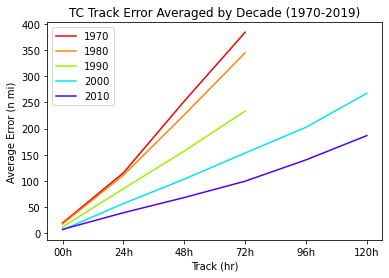

In [37]:
## Track Plot ## 
import matplotlib.pyplot as plt

xlabels=["00h", "24h", "48h", "72h", "96h", "120h", "144h"]

plt.plot(xlabels, mean_t_1970, label='1970',c='#F50000')
plt.plot(xlabels, mean_t_1980, label='1980',c='#FF8700')
plt.plot(xlabels, mean_t_1990, label='1990',c='#97F500')
plt.plot(xlabels, mean_t_2000, label='2000',c='#00E4F5')
plt.plot(xlabels, mean_t_2010, label='2010',c='#4E00F5')

    

plt.title('TC Track Error Averaged by Decade (1970-2019)')
plt.xlabel("Track (hr)")
plt.ylabel("Average Error (n mi)")
plt.legend()
plt.show()

## Intensity Mean Plots

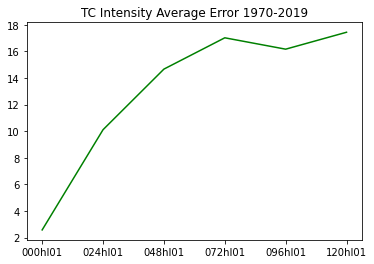

In [11]:
#Intensity Mean Plot of Whole Data set

abs_mean_intensity_NHCFV1.plot(#kind = 'scatter',
        x = 'Intensity (kt)',
        y = 'Average Error',
        color = 'g')
  
# set the title
plt.title('TC Intensity Average Error 1970-2019')
  
# show the plot
plt.show()


### Means of Intensity By Decade

#### Step by Step Mean Intensity 1970

In [76]:
#Mean 1970

NHCFV1_1970 = NHCFV1[NHCFV1["Date/Time"].str.contains("197")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

i_NHCFV_1970 = NHCFV1_1970[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]
print(i_NHCFV_1970)

      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
0     -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1     -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
2     -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
3     -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
4     -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
...       ...      ...      ...      ...      ...      ...      ...
1425  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1426  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1427  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1428  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1429  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0

[1430 rows x 7 columns]


In [77]:
#Filter Step
x= i_NHCFV_1970
i_1970=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN
print(i_1970)

      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
0         NaN      NaN      NaN      NaN      NaN      NaN      NaN
1         NaN      NaN      NaN      NaN      NaN      NaN      NaN
2         NaN      NaN      NaN      NaN      NaN      NaN      NaN
3         NaN      NaN      NaN      NaN      NaN      NaN      NaN
4         NaN      NaN      NaN      NaN      NaN      NaN      NaN
...       ...      ...      ...      ...      ...      ...      ...
1425      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1426      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1427      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1428      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1429      NaN      NaN      NaN      NaN      NaN      NaN      NaN

[1430 rows x 7 columns]


In [78]:
#Absolute value of the intensity df
abs_i_1970=i_1970.where(x>-9999.0).abs()
print(abs_i_1970)

      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
0         NaN      NaN      NaN      NaN      NaN      NaN      NaN
1         NaN      NaN      NaN      NaN      NaN      NaN      NaN
2         NaN      NaN      NaN      NaN      NaN      NaN      NaN
3         NaN      NaN      NaN      NaN      NaN      NaN      NaN
4         NaN      NaN      NaN      NaN      NaN      NaN      NaN
...       ...      ...      ...      ...      ...      ...      ...
1425      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1426      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1427      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1428      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1429      NaN      NaN      NaN      NaN      NaN      NaN      NaN

[1430 rows x 7 columns]


In [79]:
#Calculate the mean of the absolute error values
abs_mean_intensity_1970=abs_i_1970.mean()
print(abs_mean_intensity_1970)

000hI01   NaN
024hI01   NaN
048hI01   NaN
072hI01   NaN
096hI01   NaN
120hI01   NaN
144hI01   NaN
dtype: float64


#### Mean Intensity 1980-2019

In [13]:
#Mean Intensity 1980

NHCFV1_1980 = NHCFV1[NHCFV1["Date/Time"].str.contains("198")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

i_NHCFV_1980 = NHCFV1_1980[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]
print(i_NHCFV_1980)

#Filter Step
x= i_NHCFV_1980
i_1980=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN
print(i_1980)

#Absolute value of the intensity df
abs_i_1980=i_1980.where(x>-9999.0).abs()
print(abs_i_1980)

#Calculate the mean of the absolute error values
abs_mean_intensity_1980=abs_i_1980.mean()
print(abs_mean_intensity_1980)

      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
1430  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1431  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1432  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1433  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
1434  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
...       ...      ...      ...      ...      ...      ...      ...
3169  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
3170  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
3171  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
3172  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
3173  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0

[1744 rows x 7 columns]
      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
1430      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1431      NaN      NaN 

In [14]:
#Mean Intensity 1990

NHCFV1_1990 = NHCFV1[NHCFV1["Date/Time"].str.contains("199")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

i_NHCFV_1990 = NHCFV1_1990[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]
print(i_NHCFV_1990)

#Filter Step
x= i_NHCFV_1990
i_1990=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN
print(i_1990)

#Absolute value of the intensity df
abs_i_1990=i_1990.where(x>-9999.0).abs()
print(abs_i_1990)

#Calculate the mean of the absolute error values
abs_mean_intensity_1990=abs_i_1990.mean()
print(abs_mean_intensity_1990)

      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
3174     -5.0    -15.0    -15.0  -9999.0  -9999.0  -9999.0  -9999.0
3175      5.0    -15.0      5.0  -9999.0  -9999.0  -9999.0  -9999.0
3176      0.0    -15.0     10.0  -9999.0  -9999.0  -9999.0  -9999.0
3177     -5.0     -5.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
3178    -10.0      5.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
...       ...      ...      ...      ...      ...      ...      ...
5518      5.0     10.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
5519     -5.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
5520      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
5521      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
5522      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0

[2349 rows x 7 columns]
      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
3174     -5.0    -15.0    -15.0      NaN      NaN      NaN      NaN
3175      5.0    -15.0 

In [15]:
#Mean Intensity 2000

NHCFV1_2000 = NHCFV1[NHCFV1["Date/Time"].str.contains("200")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

i_NHCFV_2000 = NHCFV1_2000[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]
print(i_NHCFV_2000)

#Filter Step
x= i_NHCFV_2000
i_2000=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN
print(i_2000)

#Absolute value of the intensity df
abs_i_2000=i_2000.where(x>-9999.0).abs()
print(abs_i_2000)

#Calculate the mean of the absolute error values
abs_mean_intensity_2000=abs_i_2000.mean()
print(abs_mean_intensity_2000)

      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
5523    -10.0     -5.0    -15.0    -20.0  -9999.0  -9999.0  -9999.0
5524      0.0      5.0     -5.0    -10.0  -9999.0  -9999.0  -9999.0
5525      5.0     10.0      0.0      0.0  -9999.0  -9999.0  -9999.0
5526     10.0      0.0      0.0      5.0  -9999.0  -9999.0  -9999.0
5527     10.0     10.0      5.0     15.0  -9999.0  -9999.0  -9999.0
...       ...      ...      ...      ...      ...      ...      ...
8344      0.0     20.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
8345      5.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
8346     -5.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
8347      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
8348      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0

[2826 rows x 7 columns]
      000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
5523    -10.0     -5.0    -15.0    -20.0      NaN      NaN      NaN
5524      0.0      5.0 

In [16]:
#Mean Intensity 2010

NHCFV1_2010 = NHCFV1[NHCFV1["Date/Time"].str.contains("201")] 
#str.contains() gets a value and makes a subset of a df given the value in the contains function

i_NHCFV_2010 = NHCFV1_2010[["000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01", "144hI01"]]
print(i_NHCFV_2010)

#Filter Step
x= i_NHCFV_2010
i_2010=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN
print(i_2010)

#Absolute value of the intensity df
abs_i_2010=i_2010.where(x>-9999.0).abs()
print(abs_i_2010)

#Calculate the mean of the absolute error values
abs_mean_intensity_2010=abs_i_2010.mean()
print(abs_mean_intensity_2010)

       000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
8349      -5.0     -5.0    -10.0    -20.0    -25.0    -15.0  -9999.0
8350       0.0    -15.0    -10.0     -5.0    -10.0    -35.0  -9999.0
8351       0.0     -5.0      5.0      5.0    -15.0    -20.0  -9999.0
8352      -5.0     -5.0      0.0      5.0    -35.0  -9999.0  -9999.0
8353     -20.0      0.0     10.0      5.0     10.0  -9999.0  -9999.0
...        ...      ...      ...      ...      ...      ...      ...
11152      0.0      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11153      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11154      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11155      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
11156      0.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0

[2808 rows x 7 columns]
       000hI01  024hI01  048hI01  072hI01  096hI01  120hI01  144hI01
8349      -5.0     -5.0    -10.0    -20.0    -25.0    -15.0      NaN
8350     

### Plot Intensity By Decade

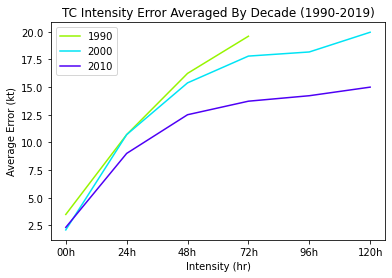

In [36]:
## Intensity Plot ##
import matplotlib.pyplot as plt
xlabels=["00h", "24h", "48h", "72h", "96h", "120h", "144h"]



# plt.plot(abs_mean_intensity_1970, label='1970')
# plt.plot(abs_mean_intensity_1980, label='1980')
plt.plot(xlabels, abs_mean_intensity_1990, label='1990', c='#97F500')
plt.plot(xlabels, abs_mean_intensity_2000, label='2000',c='#00E4F5')
plt.plot(xlabels, abs_mean_intensity_2010, label='2010',c='#4E00F5')


plt.title('TC Intensity Error Averaged By Decade (1990-2019)')
plt.xlabel("Intensity (hr)")
plt.ylabel("Average Error (kt)")
plt.legend()

plt.show()

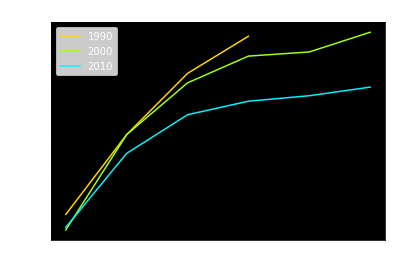

In [22]:
## Intensity Plot ## -- Changing the color of the plot
import matplotlib.pyplot as plt
import numpy as np
ax=plt.axes()

# plt.plot(abs_mean_intensity_1970, label='1970')
# plt.plot(abs_mean_intensity_1980, label='1980')
plt.plot(abs_mean_intensity_1990, label='1990', c='#FFD300')
plt.plot(abs_mean_intensity_2000, label='2000',c='#A1FF0A')
plt.plot(abs_mean_intensity_2010, label='2010',c='#0AEFFF')

def plotfigure(plot_fn, fig, background_col = 'xkcd:black', face_col = (0.06,0.06,0.06)):
    fig.patch.set_facecolor(background_col)
    plot_fn()
    ax = plt.gca()

plt.title('TC Intensity Average Error 1970-2019', c='white')
plt.xlabel("Intensity (hr)", c='white')
plt.ylabel("Average Error", c='white')
plt.legend(labelcolor='white')

plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
ax.set_facecolor(color='black')

plt.show()

# Plot By Month

## Track

### Months - time waste :(

In [68]:
#made a variable that outputs all of the columns for a specific month inside of the Date/Time column
jan_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-01-")]
print(jan_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_jan_track = jan_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_jan_track
t_jan=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_jan= t_jan.mean()
print(mean_t_jan)

                Date/Time     STMID  F012  F024  F036  F048  F072  F096  F120  \
7515  01-01-2006/00:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7516  01-01-2006/06:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7517  01-01-2006/12:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7518  01-01-2006/18:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7519  02-01-2006/00:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7520  02-01-2006/06:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7521  02-01-2006/12:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7522  02-01-2006/18:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7523  03-01-2006/00:00:00  AL312005  0.33  0.33  0.33  0.33   1.0   0.0   0.0   
7524  03-01-2006/06:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7525  03-01-2006/12:00:00  AL312005  0.33  0.33  0.33  0.33   0.0   0.0   0.0   
7526  03-01-2006/18:00:00  A

In [67]:
#FEB-MAR There is none
feb_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-02-")]
print(feb_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_feb_track = feb_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x2= t_feb_track
t_feb=x2.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_feb= t_feb.mean()
print(mean_t_feb)


mar_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-03-")]
print(feb_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_mar_track = mar_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x2= t_mar_track
t_mar=x2.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_mar= t_mar.mean()
print(mean_t_mar)

Empty DataFrame
Columns: [Date/Time, STMID, F012, F024, F036, F048, F072, F096, F120, F144, F168, Lat, Lon, WS, 000hT01, 012hT01, 024hT01, 036hT01, 048hT01, 072hT01, 096hT01, 120hT01, 144hT01, 168hT01, 000hI01, 012hI01, 024hI01, 036hI01, 048hI01, 072hI01, 096hI01, 120hI01, 144hI01, 168hI01, 000hT02, 012hT02, 024hT02, 036hT02, 048hT02, 072hT02, 096hT02, 120hT02, 144hT02, 168hT02, 000hI02, 012hI02, 024hI02, 036hI02, 048hI02, 072hI02, 096hI02, 120hI02, 144hI02, 168hI02]
Index: []

[0 rows x 54 columns]
000hT01   NaN
024hT01   NaN
048hT01   NaN
072hT01   NaN
096hT01   NaN
120hT01   NaN
dtype: float64
Empty DataFrame
Columns: [Date/Time, STMID, F012, F024, F036, F048, F072, F096, F120, F144, F168, Lat, Lon, WS, 000hT01, 012hT01, 024hT01, 036hT01, 048hT01, 072hT01, 096hT01, 120hT01, 144hT01, 168hT01, 000hI01, 012hI01, 024hI01, 036hI01, 048hI01, 072hI01, 096hI01, 120hI01, 144hI01, 168hI01, 000hT02, 012hT02, 024hT02, 036hT02, 048hT02, 072hT02, 096hT02, 120hT02, 144hT02, 168hT02, 000hI02, 012hI

In [65]:
#April
apr_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-04-")]
print(apr_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_apr_track = apr_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_apr_track
t_apr=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_apr= t_apr.mean()
print(mean_t_apr)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
3552   22-04-1992/06:00:00  AL011992  0.00  0.00  0.00  0.00   0.0   0.0   
3553   22-04-1992/12:00:00  AL011992  1.00  1.00  0.00  0.00   0.0   0.0   
3554   22-04-1992/18:00:00  AL011992  0.33  0.00  0.00  0.00   0.0   0.0   
3555   23-04-1992/00:00:00  AL011992  0.33  0.00  0.00  0.00   0.0   0.0   
3556   23-04-1992/06:00:00  AL011992  0.00  0.00  0.00  0.00   0.0   0.0   
3557   23-04-1992/12:00:00  AL011992  0.00  0.00  0.00  0.00   0.0   0.0   
6312   20-04-2003/06:00:00  AL012003  0.00  0.00  0.00  0.00   0.0   0.0   
6313   20-04-2003/12:00:00  AL012003  0.00  0.00  0.00  0.00   0.0   0.0   
6314   20-04-2003/18:00:00  AL012003  0.00  0.00  0.00  0.00   0.0   0.0   
6315   21-04-2003/00:00:00  AL012003  1.00  1.00  1.00  1.00   1.0   0.0   
6316   21-04-2003/06:00:00  AL012003  0.33  0.33  0.33  0.33   0.0   0.0   
6317   21-04-2003/12:00:00  AL012003  0.33  0.33  0.33  0.33   0.0   0.0   
6318   21-04

In [64]:
#May
may_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-05-")]
print(may_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_may_track = may_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_may_track
t_may=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_may= t_may.mean()
print(mean_t_may)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
0      20-05-1970/00:00:00  AL011970  0.00  0.00   0.0   0.0   0.0   0.0   
1      20-05-1970/06:00:00  AL011970  0.00  0.00   0.0   0.0   0.0   0.0   
2      20-05-1970/12:00:00  AL011970  0.00  0.00   0.0   0.0   0.0   0.0   
3      20-05-1970/18:00:00  AL011970  1.00  1.00   0.0   0.0   0.0   0.0   
4      21-05-1970/00:00:00  AL011970  0.33  0.33   0.0   0.0   0.0   0.0   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
10537  28-05-2018/12:00:00  AL012018  0.00  0.00   0.0   0.0   0.0   0.0   
10538  28-05-2018/18:00:00  AL012018  0.00  0.00   0.0   0.0   0.0   0.0   
10877  20-05-2019/18:00:00  AL012019  1.00  0.00   0.0   0.0   0.0   0.0   
10878  21-05-2019/00:00:00  AL012019  0.00  0.00   0.0   0.0   0.0   0.0   
10879  21-05-2019/06:00:00  AL012019  0.00  0.00   0.0   0.0   0.0   0.0   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
0      

In [63]:
#June
jun_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-06-")]
print(jun_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_jun_track = jun_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_jun_track
t_jun=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_jun= t_jun.mean()
print(mean_t_jun)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
307    16-06-1972/12:00:00  AL021972  1.00  1.00   0.0  1.00  1.00   0.0   
308    16-06-1972/18:00:00  AL021972  0.33  0.33   0.0  0.33  0.33   0.0   
309    17-06-1972/00:00:00  AL021972  0.33  0.33   0.0  0.33  0.33   0.0   
310    17-06-1972/06:00:00  AL021972  0.33  0.33   0.0  0.33  0.00   0.0   
311    17-06-1972/12:00:00  AL021972  0.33  0.33   0.0  0.33  0.00   0.0   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
10222  21-06-2017/18:00:00  AL032017  0.33  0.33   0.0  0.00  0.00   0.0   
10223  22-06-2017/00:00:00  AL032017  0.33  0.00   0.0  0.00  0.00   0.0   
10224  22-06-2017/06:00:00  AL032017  0.33  0.00   0.0  0.00  0.00   0.0   
10225  22-06-2017/12:00:00  AL032017  0.00  0.00   0.0  0.00  0.00   0.0   
10226  22-06-2017/18:00:00  AL032017  0.00  0.00   0.0  0.00  0.00   0.0   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
307    

In [62]:
#July
jul_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-07-")]
print(jul_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_jul_track = jul_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_jul_track
t_jul=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_jul= t_jul.mean()
print(mean_t_jul)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
9      20-07-1970/12:00:00  AL021970  1.00  1.00   0.0   0.0   0.0   0.0   
10     20-07-1970/18:00:00  AL021970  0.33  0.33   0.0   0.0   0.0   0.0   
11     21-07-1970/00:00:00  AL021970  0.33  0.33   0.0   0.0   0.0   0.0   
12     21-07-1970/06:00:00  AL021970  0.33  0.33   0.0   0.0   0.0   0.0   
13     21-07-1970/12:00:00  AL021970  0.33  0.00   0.0   0.0   0.0   0.0   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
10890  13-07-2019/18:00:00  AL022019  0.33  0.33   0.0   0.0   0.0   0.0   
10891  14-07-2019/00:00:00  AL022019  0.33  0.00   0.0   0.0   0.0   0.0   
10892  14-07-2019/06:00:00  AL022019  0.33  0.00   0.0   0.0   0.0   0.0   
10893  14-07-2019/12:00:00  AL022019  0.00  0.00   0.0   0.0   0.0   0.0   
10894  14-07-2019/18:00:00  AL022019  0.00  0.00   0.0   0.0   0.0   0.0   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
9      

In [61]:
#August
aug_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-08-")]
print(aug_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_aug_track =aug_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_aug_track
t_aug=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_aug= t_aug.mean()
print(mean_t_aug)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
17     01-08-1970/12:00:00  AL041970  1.00  1.00  0.00  1.00  1.00  0.00   
18     01-08-1970/18:00:00  AL041970  0.33  0.33  0.00  0.33  0.33  0.00   
19     02-08-1970/00:00:00  AL041970  0.33  0.33  0.00  0.33  0.00  0.00   
20     02-08-1970/06:00:00  AL041970  0.33  0.33  0.00  0.33  0.00  0.00   
21     02-08-1970/12:00:00  AL041970  0.33  0.33  0.00  0.33  0.00  0.00   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
10927  31-08-2019/18:00:00  AL052019  0.33  0.33  0.33  0.33  0.33  0.33   
10955  27-08-2019/18:00:00  AL062019  1.00  0.00  0.00  0.00  0.00  0.00   
10956  28-08-2019/00:00:00  AL062019  0.33  0.00  0.00  0.00  0.00  0.00   
10957  28-08-2019/06:00:00  AL062019  0.00  0.00  0.00  0.00  0.00  0.00   
10958  28-08-2019/12:00:00  AL062019  0.00  0.00  0.00  0.00  0.00  0.00   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
17     

In [60]:
#September
sep_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-09-")]
print(sep_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_sep_track =sep_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_sep_track
t_sep=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_sep= t_sep.mean()
print(mean_t_sep)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
46     10-09-1970/18:00:00  AL121970  1.00  1.00  0.00  1.00   0.0   0.0   
47     11-09-1970/00:00:00  AL121970  0.33  0.33  0.00  0.33   0.0   0.0   
48     11-09-1970/06:00:00  AL121970  0.33  0.33  0.00  0.00   0.0   0.0   
49     11-09-1970/12:00:00  AL121970  0.33  0.33  0.00  0.00   0.0   0.0   
50     11-09-1970/18:00:00  AL121970  0.33  0.33  0.00  0.00   0.0   0.0   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
11084  29-09-2019/18:00:00  AL132019  0.33  0.33  0.33  0.33   0.0   0.0   
11085  30-09-2019/00:00:00  AL132019  0.33  0.33  0.33  0.33   0.0   0.0   
11086  30-09-2019/06:00:00  AL132019  0.33  0.33  0.33  0.33   0.0   0.0   
11087  30-09-2019/12:00:00  AL132019  0.33  0.33  0.33  0.00   0.0   0.0   
11088  30-09-2019/18:00:00  AL132019  0.33  0.33  0.33  0.00   0.0   0.0   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
46     

In [59]:
#October
oct_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-10-")]
print(oct_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_oct_track =oct_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_oct_track
t_oct=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_oct= t_oct.mean()
print(mean_t_oct)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
240    01-10-1971/00:00:00  AL141971  0.33  0.00   0.0   0.0   0.0   0.0   
241    01-10-1971/06:00:00  AL141971  0.00  0.00   0.0   0.0   0.0   0.0   
242    01-10-1971/12:00:00  AL141971  0.00  0.00   0.0   0.0   0.0   0.0   
504    09-10-1973/06:00:00  AL141973  0.00  0.00   0.0   0.0   0.0   0.0   
505    09-10-1973/12:00:00  AL141973  0.00  0.00   0.0   0.0   0.0   0.0   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
11128  30-10-2019/18:00:00  AL192019  1.00  1.00   0.0   0.0   0.0   0.0   
11129  31-10-2019/00:00:00  AL192019  0.33  0.33   0.0   0.0   0.0   0.0   
11130  31-10-2019/06:00:00  AL192019  0.33  0.00   0.0   0.0   0.0   0.0   
11131  31-10-2019/12:00:00  AL192019  0.33  0.00   0.0   0.0   0.0   0.0   
11132  31-10-2019/18:00:00  AL192019  0.00  0.00   0.0   0.0   0.0   0.0   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
240    

In [58]:
#November
nov_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-11-")]
print(nov_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_nov_track =nov_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_nov_track
t_nov=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_nov= t_nov.mean()
print(mean_t_nov)

                 Date/Time     STMID  F012  F024  F036  F048  F072  F096  \
277    14-11-1971/12:00:00  AL221971  0.00  0.00   0.0  0.00  0.00   0.0   
278    14-11-1971/18:00:00  AL221971  1.00  1.00   0.0  1.00  1.00   0.0   
279    15-11-1971/00:00:00  AL221971  0.33  0.33   0.0  0.33  0.33   0.0   
280    15-11-1971/06:00:00  AL221971  0.33  0.33   0.0  0.33  0.33   0.0   
281    15-11-1971/12:00:00  AL221971  0.33  0.33   0.0  0.33  0.33   0.0   
...                    ...       ...   ...   ...   ...   ...   ...   ...   
11152  23-11-2019/18:00:00  AL202019  0.33  0.33   0.0  0.00  0.00   0.0   
11153  24-11-2019/00:00:00  AL202019  0.33  0.00   0.0  0.00  0.00   0.0   
11154  24-11-2019/06:00:00  AL202019  0.33  0.00   0.0  0.00  0.00   0.0   
11155  24-11-2019/12:00:00  AL202019  0.00  0.00   0.0  0.00  0.00   0.0   
11156  24-11-2019/18:00:00  AL202019  0.00  0.00   0.0  0.00  0.00   0.0   

       F120  F144  ...  000hI02  012hI02  024hI02  036hI02  048hI02  072hI02  \
277    

In [57]:
#December
dec_track = NHCFV1[NHCFV1["Date/Time"].str.contains("-12-")]
print(dec_track)

#str.contains() gets a value and makes a subset of a df given the value in the contains function

t_dec_track =dec_track[["000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

#Filter Step
x= t_dec_track
t_dec=x.where( x>-9999.0) #.where function changes values you don't want computed into NaN

#Mean step 
mean_t_dec= t_dec.mean()
print(mean_t_dec)

                Date/Time     STMID  F012  F024  F036  F048  F072  F096  F120  \
2244  12-12-1984/12:00:00  AL201984   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2245  12-12-1984/18:00:00  AL201984   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2246  13-12-1984/00:00:00  AL201984   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2247  13-12-1984/06:00:00  AL201984   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2248  13-12-1984/12:00:00  AL201984   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                   ...       ...   ...   ...   ...   ...   ...   ...   ...   
9635  06-12-2013/00:00:00  AL152013   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9636  06-12-2013/06:00:00  AL152013   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9637  06-12-2013/12:00:00  AL152013   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9638  06-12-2013/18:00:00  AL152013   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9639  07-12-2013/00:00:00  AL152013   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      F144  ...  000hI02  0

### Making df

In [70]:
#df that is just the track hours and date/time column
track_data=NHCFV1[["Date/Time","000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]
track_data

,Date/Time,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01
0,20-05-1970/00:00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,20-05-1970/06:00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,20-05-1970/12:00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,20-05-1970/18:00:00,42.4,145.4,-9999.0,-9999.0,-9999.0,-9999.0
4,21-05-1970/00:00:00,49.6,139.7,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...
11152,23-11-2019/18:00:00,6.0,37.2,-9999.0,-9999.0,-9999.0,-9999.0
11153,24-11-2019/00:00:00,5.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
11154,24-11-2019/06:00:00,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
11155,24-11-2019/12:00:00,11.4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [71]:
# makes the Date/Time column into actual dates that can be grabbed by python when sayign a specific date/time
pd.to_datetime(track_data["Date/Time"])


0       1970-05-20 00:00:00
1       1970-05-20 06:00:00
2       1970-05-20 12:00:00
3       1970-05-20 18:00:00
4       1970-05-21 00:00:00
                ...        
11152   2019-11-23 18:00:00
11153   2019-11-24 00:00:00
11154   2019-11-24 06:00:00
11155   2019-11-24 12:00:00
11156   2019-11-24 18:00:00
Name: Date/Time, Length: 11157, dtype: datetime64[ns]

In [72]:
#changes from a list to a index to use some function 
track_data.index=pd.to_datetime(track_data["Date/Time"])

In [73]:
track_data=track_data.drop("Date/Time",axis=1)
# .drop takes off columns ->(axis=1) because without it there's two date/time columns

In [74]:
#getting rid of the -9999.0s
track_data=track_data.where(track_data>-9999.0)

### Seeing characteristics of data

In [127]:
track_months.describe()

,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01,144hT01
count,10578.000000,8321.000000,6377.000000,4901.000000,1873.000000,1470.000000,0.0
mean,11.425600,74.214554,141.736883,210.126525,171.032515,226.521224,NaN
std,14.280432,59.613265,119.877728,179.885144,119.330633,154.534363,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,NaN
25%,0.000000,32.200000,58.400000,88.600000,87.100000,119.000000,NaN
50%,7.900000,58.800000,107.700000,161.200000,144.500000,187.900000,NaN
75%,14.900000,98.200000,187.800000,275.000000,224.600000,293.300000,NaN
max,217.300000,658.500000,1063.100000,1552.500000,1009.000000,1060.600000,NaN


In [146]:
track_months.index.month

Int64Index([2, 2, 2, 2, 3, 3, 3, 3, 4, 0,
            ...
            4, 4, 5, 5, 5, 5, 6, 6, 6, 6],
           dtype='int64', name='Date/Time', length=11157)

<AxesSubplot:>

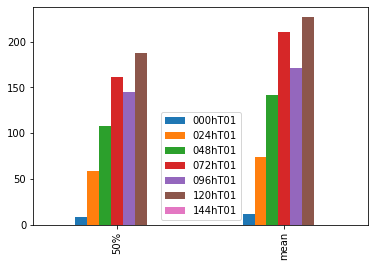

In [128]:
track_months.describe().loc[["50%","mean"],:].plot(kind="bar") 
# 50% is the median inside of the describe function, 
# .loc[] takes the columns or rows in the describe table (50% and median) 
# and plot() plots it of course

<AxesSubplot:>

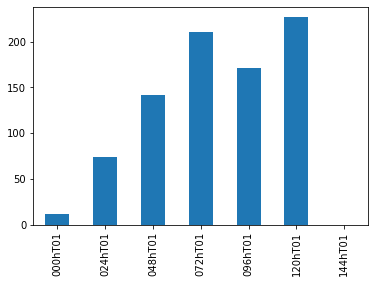

In [129]:
track_months.describe().loc["mean",:].plot(kind="bar")

/glade/scratch/jrobinson/ipykernel_287779/2887123927.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  track_months["2000":"2019"].resample("M").mean().plot()


<AxesSubplot:xlabel='Date/Time'>

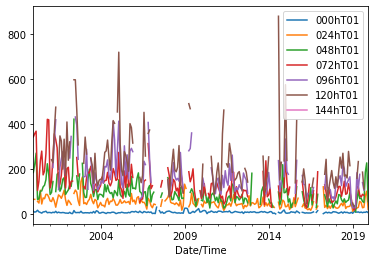

In [130]:
#Resamples the data into months but seperated by year- need to fix
track_months["2000":"2019"].resample("M").mean().plot() 
#M is months 

<AxesSubplot:xlabel='Date/Time'>

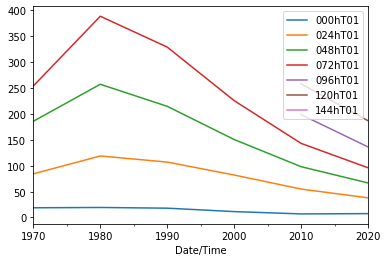

In [131]:
#By decade but easier than previously done

track_months.groupby(pd.Grouper(freq="10Y")).mean().plot() 
#groupby(): combination of splitting the object, applying a function, and combining the results

In [71]:
track_months.groupby(track_months.index.month).count()

#groupby by groups things like months or attributes of columns 1s and 2s and 3s
#

,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01,144hT01
Date/Time,,,,,,,
1,382,298,217,149,70,62,0
2,365,293,206,153,73,64,0
3,340,248,192,143,75,55,0
4,345,261,177,140,68,51,0
5,380,256,188,145,62,47,0
6,477,345,233,160,61,42,0
7,787,569,375,255,103,79,0
8,2343,1941,1606,1294,432,339,0
9,3032,2465,1948,1535,641,516,0


### Plot

Text(0.5, 0, 'Month')

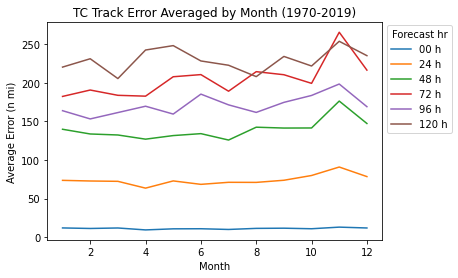

In [94]:
#By month
import matplotlib.pyplot as plt

track_data.groupby(track_data.index.month).mean().plot(
#yerr =track_data.groupby(track_data.index.month).std() # not right
) 

# plt.legend([ "00 h", "24 h", "48 h", "72 h", "96 h", "120 h"])
plt.legend([ "00 h", "24 h", "48 h", "72 h", "96 h", "120 h"], loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)
plt.title('TC Track Error Averaged by Month (1970-2019)')
plt.ylabel('Average Error (n mi)')
plt.xlabel('Month')


# plt.errorbar(track_data.index.month, track_data.groupby(track_data.index.month).mean(), yerr=track_data.groupby(track_data.index.month).std())
# plt.show()


## Intensity

In [87]:
#df that is just the track hours and date/time column
int_data=NHCFV1[["Date/Time","000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01"]]

# makes the Date/Time column into actual dates that can be grabbed by python when sayign a specific date/time
pd.to_datetime(int_data["Date/Time"])

#changes from a list to a index to use some function 
int_data.index=pd.to_datetime(int_data["Date/Time"])

int_data=int_data.drop("Date/Time",axis=1)
# .drop takes off columns ->(axis=1) because without it there's two date/time columns

#getting rid of the -9999.0s INCLUDING THE ABSOLUTE 
int_data=int_data.where(int_data>-9999.0).abs()

In [57]:
int_data['2000']

/glade/scratch/jrobinson/ipykernel_282171/1385641351.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  int_data['2000']


,000hI01,024hI01,048hI01,072hI01,096hI01,120hI01
Date/Time,,,,,,
2000-04-08 06:00:00,10.0,5.0,15.0,20.0,NaN,NaN
2000-04-08 12:00:00,0.0,5.0,5.0,10.0,NaN,NaN
2000-04-08 18:00:00,5.0,10.0,0.0,0.0,NaN,NaN
2000-05-08 00:00:00,10.0,0.0,0.0,5.0,NaN,NaN
2000-05-08 06:00:00,10.0,10.0,5.0,15.0,NaN,NaN
...,...,...,...,...,...,...
2000-10-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-28 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Month')

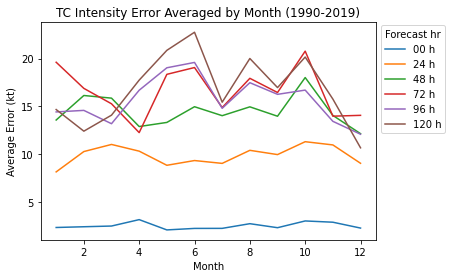

In [95]:
#By month
import matplotlib.pyplot as plt

int_data.groupby(int_data.index.month).mean().plot() 

# plt.legend(["00 h", "24 h", "48 h", "72 h", "96 h", "120 h"])
plt.legend(["00 h", "24 h", "48 h", "72 h", "96 h", "120 h"], loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)


plt.title('TC Intensity Error Averaged by Month (1990-2019)')
plt.ylabel('Average Error (kt)')
plt.xlabel('Month')



In [70]:
int_data.groupby(int_data.index.month).count()

,000hI01,024hI01,048hI01,072hI01,096hI01,120hI01
Date/Time,,,,,,
1,265,211,159,115,70,62
2,273,220,162,122,73,64
3,259,188,150,108,75,55
4,269,207,136,110,68,51
5,306,198,150,112,62,47
6,366,265,176,122,61,42
7,643,464,322,216,103,79
8,1745,1439,1216,1014,432,339
9,2123,1708,1382,1112,641,516


# Plot By Day

## Track

In [25]:
#df that is just the track hours and date/time column
track_data=NHCFV1[["Date/Time","000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

# makes the Date/Time column into actual dates that can be grabbed by python when sayign a specific date/time
pd.to_datetime(track_data["Date/Time"])

#changes from a list to a index to use some function 
track_data.index=pd.to_datetime(track_data["Date/Time"])

track_data=track_data.drop("Date/Time",axis=1)
# .drop takes off columns ->(axis=1) because without it there's two date/time columns

#getting rid of the -9999.0s
track_data=track_data.where(track_data>-9999.0)

In [41]:
track_mean=track_data.groupby(track_data.index.day).mean()
track_mean

,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01
Date/Time,,,,,,
1,7.995238,68.035294,135.307692,178.100000,NaN,NaN
5,5.757895,33.087500,45.733333,NaN,NaN,NaN
6,9.867568,75.448718,133.878571,190.533333,NaN,NaN
7,9.264158,62.083486,101.512025,156.641739,150.704412,181.662069
8,10.487477,68.398241,132.543007,224.841981,214.348077,326.290323
9,12.716438,76.400710,139.298358,202.645946,151.589030,201.133167
10,11.108578,74.853146,146.609314,196.251601,187.687097,243.047872
11,11.870892,86.153846,165.399123,241.308861,185.150000,258.816667
12,5.398795,70.528846,155.300000,178.038889,366.214286,683.310000


In [40]:
track_day_where=track_mean.where(track_data.groupby(track_data.index.day).count()>99)
track_day_where 

,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01
Date/Time,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,9.264158,62.083486,101.512025,156.641739,NaN,NaN
8,10.487477,68.398241,132.543007,224.841981,NaN,NaN
9,12.716438,76.400710,139.298358,202.645946,151.589030,201.133167
10,11.108578,74.853146,146.609314,196.251601,187.687097,NaN
11,11.870892,86.153846,165.399123,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
track_data.groupby(track_data.index.day).count()

,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01
Date/Time,,,,,,
1,21,17,13,1,0,0
5,19,8,3,0,0,0
6,74,39,14,3,0,0
7,279,218,158,115,68,58
8,543,398,286,212,52,31
9,2038,1690,1340,1073,474,401
10,851,604,408,281,124,94
11,213,156,114,79,20,12
12,83,52,27,18,14,10


([<matplotlib.axis.XTick at 0x2b1ea9e35a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

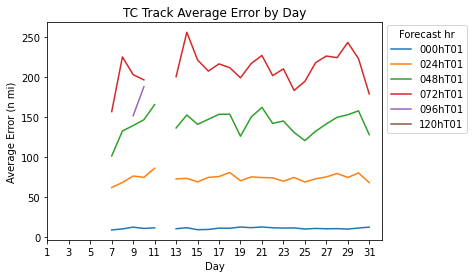

In [45]:
#Track By day WITH the where to exclude certain days
import matplotlib.pyplot as plt


track_day_where.plot() 
plt.legend(loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)
plt.title('TC Track Average Error by Day')
plt.ylabel('Average Error (n mi)')
plt.xlabel('Day')
plt.xticks(np.arange(1, 33, 2))



In [32]:
track_day=track_data[['000hT01','024hT01','048hT01','072hT01']]
track_day

,000hT01,024hT01,048hT01,072hT01
Date/Time,,,,
1970-05-20 00:00:00,NaN,NaN,NaN,NaN
1970-05-20 06:00:00,NaN,NaN,NaN,NaN
1970-05-20 12:00:00,NaN,NaN,NaN,NaN
1970-05-20 18:00:00,42.4,145.4,NaN,NaN
1970-05-21 00:00:00,49.6,139.7,NaN,NaN
...,...,...,...,...
2019-11-23 18:00:00,6.0,37.2,NaN,NaN
2019-11-24 00:00:00,5.0,NaN,NaN,NaN
2019-11-24 06:00:00,0.0,NaN,NaN,NaN


([<matplotlib.axis.XTick at 0x2b1ea6431820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

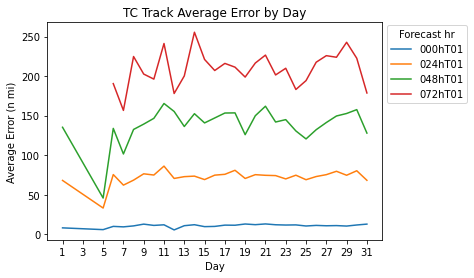

In [33]:
#Track By day Without the .where to exclude certain days
import matplotlib.pyplot as plt


track_day.groupby(track_day.index.day).mean().plot() 
plt.legend(loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)
plt.title('TC Track Average Error by Day')
plt.ylabel('Average Error (n mi)')
plt.xlabel('Day')
plt.xticks(np.arange(1, 33, 2))



Text(0.5, 0, 'Day')

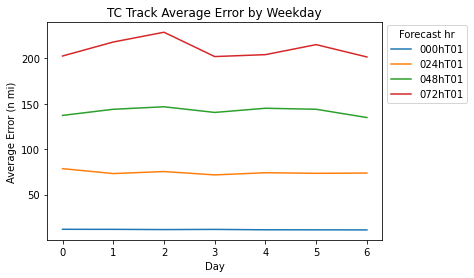

In [10]:
#Track By Weekday
import matplotlib.pyplot as plt


track_day.groupby(track_day.index.weekday).mean().plot() 
plt.legend(loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)
plt.title('TC Track Average Error by Weekday')
plt.ylabel('Average Error (n mi)')
plt.xlabel('Day')


In [181]:
track_data.groupby(track_data.index.weekday).count()

,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01
Date/Time,,,,,,
0,1482,1138,847,670,255,185
1,1539,1248,971,742,267,210
2,1508,1206,891,664,267,223
3,1511,1187,904,736,264,200
4,1554,1191,948,685,244,198
5,1480,1161,897,686,275,226
6,1504,1190,919,718,301,228


## Intensity

In [151]:
#df that is just the track hours and date/time column
int_data=NHCFV1[["Date/Time","000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01"]]

# makes the Date/Time column into actual dates that can be grabbed by python when sayign a specific date/time
pd.to_datetime(int_data["Date/Time"])

#changes from a list to a index to use some function 
int_data.index=pd.to_datetime(int_data["Date/Time"])

int_data=int_data.drop("Date/Time",axis=1)
# .drop takes off columns ->(axis=1) because without it there's two date/time columns

#getting rid of the -9999.0s INCLUDING THE ABSOLUTE 
int_data=int_data.where(int_data>-9999.0).abs()

In [164]:
int_data.groupby(int_data.index.day).count()

,000hI01,024hI01,048hI01,072hI01,096hI01,120hI01
Date/Time,,,,,,
1,21,17,13,1,0,0
5,15,7,3,0,0,0
6,58,30,12,3,0,0
7,229,184,141,108,68,58
8,388,281,202,152,52,31
9,1339,1097,894,737,474,401
10,702,501,346,242,124,94
11,159,107,73,51,20,12
12,70,43,26,18,14,10


([<matplotlib.axis.XTick at 0x2ad71d6011f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

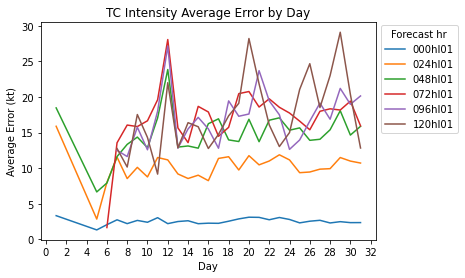

In [158]:
#By day
import matplotlib.pyplot as plt


int_data.groupby(int_data.index.day).mean().plot() 
plt.legend(loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)
plt.title('TC Intensity Average Error by Day')
plt.ylabel('Average Error (kt)')
plt.xlabel('Day')
plt.xticks(np.arange(0, 33, 2))


# Plot By Hour

## Intensity

In [151]:
#df that is just the track hours and date/time column
int_data=NHCFV1[["Date/Time","000hI01", "024hI01","048hI01", "072hI01", "096hI01", "120hI01"]]

# makes the Date/Time column into actual dates that can be grabbed by python when sayign a specific date/time
pd.to_datetime(int_data["Date/Time"])

#changes from a list to a index to use some function 
int_data.index=pd.to_datetime(int_data["Date/Time"])

int_data=int_data.drop("Date/Time",axis=1)
# .drop takes off columns ->(axis=1) because without it there's two date/time columns

#getting rid of the -9999.0s INCLUDING THE ABSOLUTE 
int_data=int_data.where(int_data>-9999.0).abs()

In [165]:
int_data.groupby(int_data.index.hour).count()

,000hI01,024hI01,048hI01,072hI01,096hI01,120hI01
Date/Time,,,,,,
0,1915,1485,1162,909,458,362
6,1940,1511,1180,927,471,370
12,1947,1526,1190,935,478,371
18,1949,1517,1186,922,466,367


([<matplotlib.axis.XTick at 0x2ad71d927970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

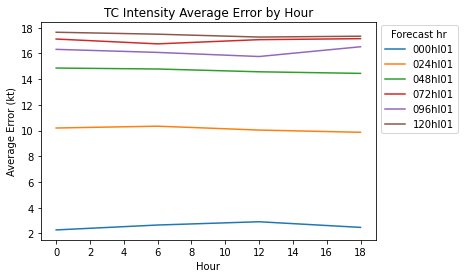

In [168]:
#By day
import matplotlib.pyplot as plt


int_data.groupby(int_data.index.hour).mean().plot() 
plt.legend(loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)
plt.title('TC Intensity Average Error by Hour')
plt.ylabel('Average Error (kt)')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 19, 2))


## Track

In [148]:
#df that is just the track hours and date/time column
track_data=NHCFV1[["Date/Time","000hT01", "024hT01","048hT01", "072hT01", "096hT01", "120hT01"]]

# makes the Date/Time column into actual dates that can be grabbed by python when sayign a specific date/time
pd.to_datetime(track_data["Date/Time"])

#changes from a list to a index to use some function 
track_data.index=pd.to_datetime(track_data["Date/Time"])

track_data=track_data.drop("Date/Time",axis=1)
# .drop takes off columns ->(axis=1) because without it there's two date/time columns

#getting rid of the -9999.0s
track_data=track_data.where(track_data>-9999.0)

In [169]:
track_data.groupby(track_data.index.hour).count()

,000hT01,024hT01,048hT01,072hT01,096hT01,120hT01
Date/Time,,,,,,
0,2622,2052,1569,1210,458,362
6,2636,2071,1586,1221,471,370
12,2654,2101,1615,1242,478,371
18,2666,2097,1607,1228,466,367


([<matplotlib.axis.XTick at 0x2ad71db876a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

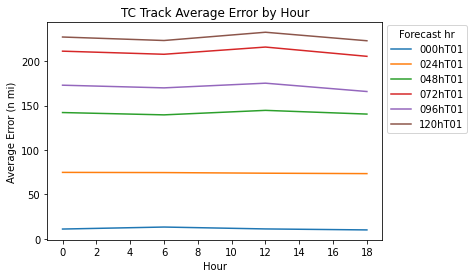

In [173]:
#Track By hour
import matplotlib.pyplot as plt


track_data.groupby(track_data.index.hour).mean().plot() 
plt.legend(loc='best', bbox_to_anchor=(1, 1.01), title='Forecast hr') #(x, y)
plt.title('TC Track Average Error by Hour')
plt.ylabel('Average Error (n mi)')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 19, 2))

